In [25]:
from shogun import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn import svm
from shogun import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

import warnings
warnings.filterwarnings('ignore')

In [26]:
dataframe = pd.read_csv('../data/vid-game.csv')
df = dataframe.dropna()


In [27]:
#Data preprocessing

#Get Features
col_x = [col for col in df.columns
      if col != 'Genre']
X= df[col_x]

# target variable
target = ['Genre']
y= df[target]

X = X.drop(columns=['Name'],axis=0) #Name variable doesn't hold much info#Now we have only the categorical variable
encoder = LabelEncoder()
s = (X.dtypes == 'object')
cat_vars= list(s[s].index)



In [28]:
#  Labeling properly the columns with object data type
le = LabelEncoder()

num_X = X.copy()
for col in cat_vars:
    num_X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)  #Convert to float    

#Convert features and labels suitable for shogun
num_X= num_X.to_numpy().astype(float)
y= y.astype(float)
y = y.reshape(y.shape[0],) #reshape to (num_samples,)

X_train, X_test, y_train, y_test = train_test_split(num_X, y, test_size=0.33, random_state=42)


In [29]:
#Parameters for plotting
time_skl = []
time_sgn = []
time_diff = []
accuracy_skl=[]
accuracy_sgn=[]
size = [1000,2000,3000,4000,5000,6000,7000,8000,9000]

In [35]:
for m in size:
    print(m)


#SKLEARN
    X_train_temp = X_train[:m]
    y_train_temp = y_train[:m]
    skr = svm.SVC()

    t0 = time()
    skr.fit(X_train_temp, y_train_temp)
    tsk1 = time() - t0

    #Predict on test
    y_predict = skr.predict(X_test)
    err_skl = accuracy_score(y_test,y_predict)
    accuracy_skl.append(err_skl) #Accuracy score on entire testset
    
    


#SHOGUN
    train_features = RealFeatures(X_train_temp.T)
    labels_train = MulticlassLabels(y_train_temp)

    
    C = 1.0
    epsilon = 0.001
    gauss_kernel = GaussianKernel(train_features, train_features, 15)

    sg_svm = MulticlassLibSVM(C, gauss_kernel, labels_train)
    sg_svm.set_epsilon(epsilon)


    t0 = time()
    sg_svm.train()
    tsg1= time() - t0

    #Apply to test set
    labels_predict=sg_svm.apply_multiclass(RealFeatures(X_test.T))
    labels_predict = np.array(labels_predict.get_labels())
    err_sgn = accuracy_score(y_test,labels_predict)
    accuracy_sgn.append(err_sgn)

    
    print("Sklearn time:  " + str(tsk1))
    print("SKL Accuracy: " + str(err_skl))
    print("Shogun time: " + str(tsg1))
    print("Shogun Accuracy: " + str(err_sgn))
    print('\n')
    
    time_skl.append(tsk1)
    time_sgn.append(tsg1)
    time_diff.append(tsk1-tsg1)


1000
Sklearn time:  0.09634137153625488
SKL Accuracy: 0.24189968930315137
Shogun time: 0.5014467239379883
Shogun Accuracy: 0.2396804260985353


2000
Sklearn time:  0.3824331760406494
SKL Accuracy: 0.2396804260985353
Shogun time: 1.6622819900512695
Shogun Accuracy: 0.2396804260985353


3000
Sklearn time:  0.8923928737640381
SKL Accuracy: 0.24101198402130491
Shogun time: 3.7691304683685303
Shogun Accuracy: 0.2396804260985353


4000
Sklearn time:  1.5730223655700684
SKL Accuracy: 0.2458943630714603
Shogun time: 6.582290410995483
Shogun Accuracy: 0.2401242787394585


5000
Sklearn time:  1.7700707912445068
SKL Accuracy: 0.24545051043053706
Shogun time: 8.126909971237183
Shogun Accuracy: 0.24145583666222814


6000
Sklearn time:  2.1092610359191895
SKL Accuracy: 0.24545051043053706
Shogun time: 9.082785606384277
Shogun Accuracy: 0.24145583666222814


7000
Sklearn time:  2.132415771484375
SKL Accuracy: 0.24545051043053706
Shogun time: 8.619129657745361
Shogun Accuracy: 0.24145583666222814


80

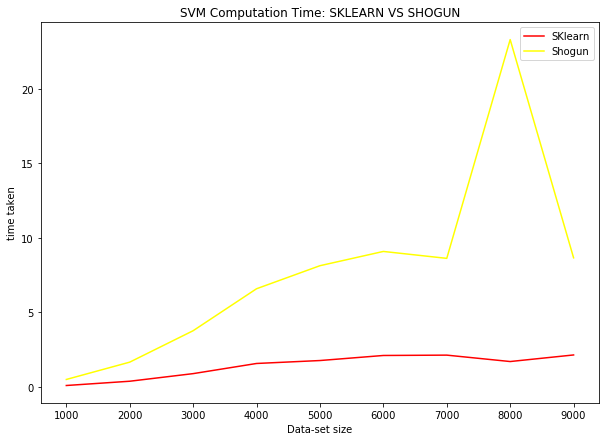

In [36]:
# PLOTTING ComputationTime
plt.figure(figsize=(10,7))
plt.title('SVM Computation Time: SKLEARN VS SHOGUN')
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()

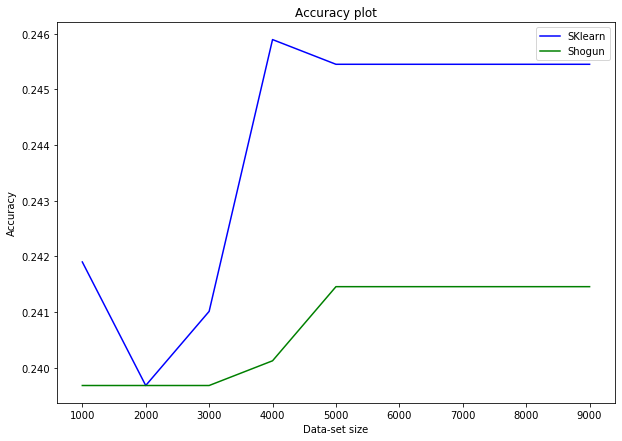

In [37]:
# PLOTTING Accuracy
plt.figure(figsize=(10,7))
plt.title('Accuracy plot')
plt.plot(size,accuracy_skl,color='blue',label='SKlearn')
plt.plot(size,accuracy_sgn,color='green',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('Accuracy')
plt.legend()